In [ ]:
import numpy as np
import pandas as pd


data = pd.read_csv('/content/taxi_trip_pricing.csv')

data

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


In [ ]:
data.isna().sum()

,0
Trip_Distance_km,50
Time_of_Day,50
Day_of_Week,50
Passenger_Count,50
Traffic_Conditions,50
Weather,50
Base_Fare,50
Per_Km_Rate,50
Per_Minute_Rate,50
Trip_Duration_Minutes,50


In [ ]:
new_data = data.copy()

new_data.dropna(inplace=True)

new_data.shape # dropping all null values reduces dataset by half.

(562, 11)

In [ ]:
data.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [ ]:
data.columns

Index(['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count',
       'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'],
      dtype='object')

In [ ]:
categorical_data = data[['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']]
categorical_data

,Time_of_Day,Day_of_Week,Traffic_Conditions,Weather
0,Morning,Weekday,Low,Clear
1,Afternoon,Weekday,High,Clear
2,Evening,Weekend,High,Clear
3,Evening,Weekday,Low,NaN
4,Evening,Weekday,High,Clear
...,...,...,...,...
995,Afternoon,Weekend,Medium,Clear
996,Night,Weekday,Medium,Clear
997,Morning,Weekday,Low,Rain
998,Morning,Weekday,Low,Clear


In [ ]:
numerical_data = data.drop(columns = ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather'])
numerical_data

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,3.0,3.56,0.80,0.32,53.82,36.2624
1,47.59,1.0,NaN,0.62,0.43,40.57,NaN
2,36.87,1.0,2.70,1.21,0.15,37.27,52.9032
3,30.33,4.0,3.48,0.51,0.15,116.81,36.4698
4,NaN,3.0,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...
995,5.49,4.0,2.39,0.62,0.49,58.39,34.4049
996,45.95,4.0,3.12,0.61,NaN,61.96,62.1295
997,7.70,3.0,2.08,1.78,NaN,54.18,33.1236
998,47.56,1.0,2.67,0.82,0.17,114.94,61.2090


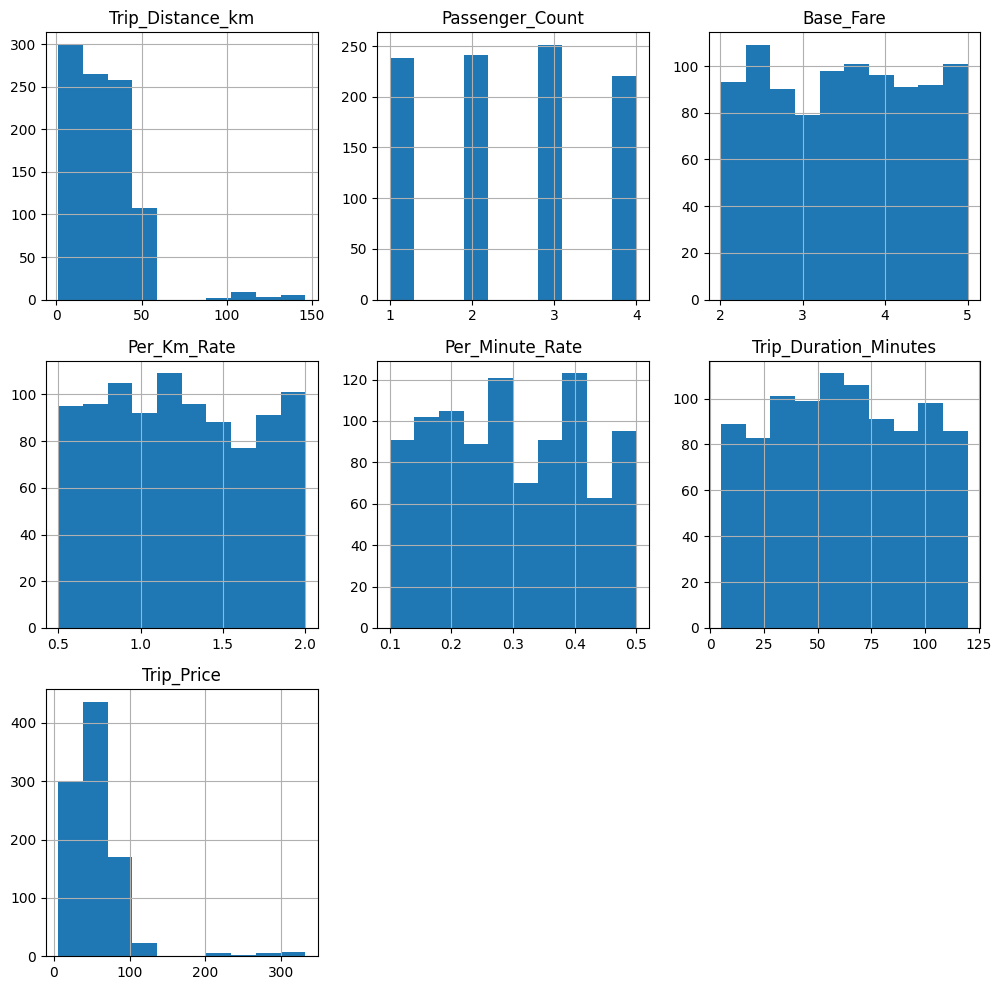

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize = (10, 10))
hist = data.hist(bins = 10, ax=axes)
plt.tight_layout()
plt.show() # This shows that Distance and price have some outliers, while other columns have a sort of uniform distribution.

<Axes: xlabel='Time_of_Day'>

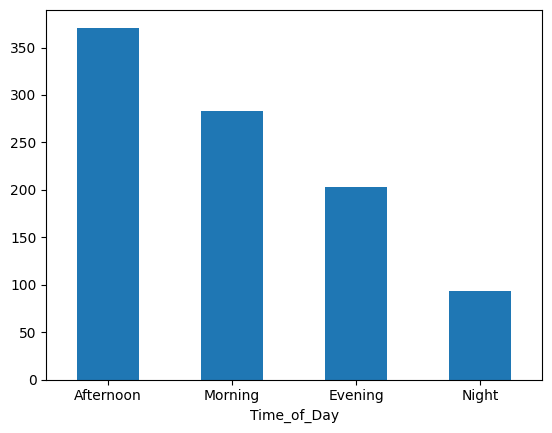

In [ ]:
data['Time_of_Day'].value_counts().plot.bar(rot=0) # Morning has the most frequency.

<Axes: xlabel='Day_of_Week'>

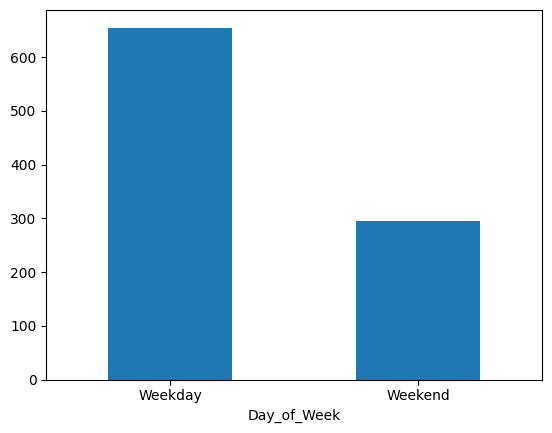

In [ ]:
data['Day_of_Week'].value_counts().plot.bar(rot=0) # Weekday is almost twice as frequent as weekend.

<Axes: xlabel='Traffic_Conditions'>

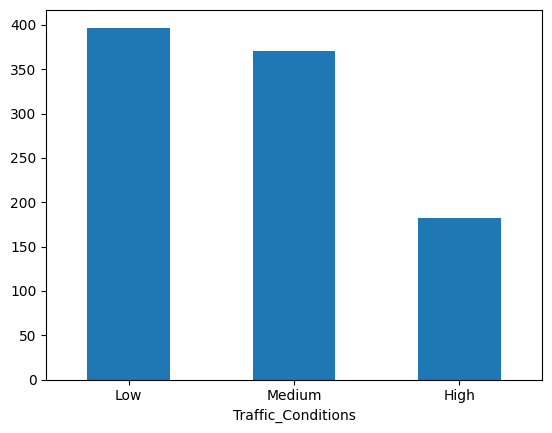

In [ ]:
data['Traffic_Conditions'].value_counts().plot.bar(rot=0) # low and medium traffic conditions are almost same

<Axes: xlabel='Weather'>

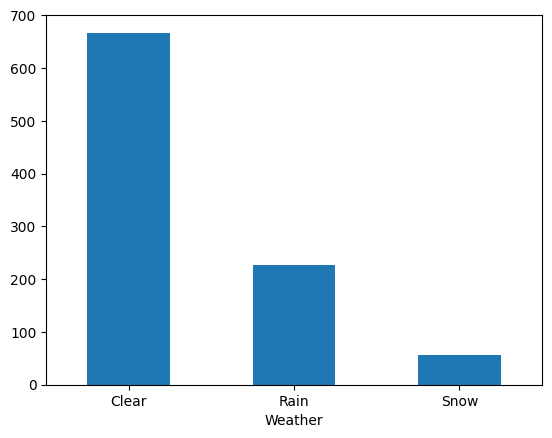

In [ ]:
data['Weather'].value_counts().plot.bar(rot=0) # clear weather is more than the sum of the other two

In [ ]:
'''
for categorical, replace by most frequent, for numerical, by mean or median.
'''

from warnings import filterwarnings
filterwarnings('ignore')

from random import choice

for col in categorical_data.columns:
  data[col].fillna(data[col].mode()[0], inplace=True)

for col in numerical_data.columns:
  data[col].fillna(data[col].median(), inplace=True)

data.isna().sum()

,0
Trip_Distance_km,0
Time_of_Day,0
Day_of_Week,0
Passenger_Count,0
Traffic_Conditions,0
Weather,0
Base_Fare,0
Per_Km_Rate,0
Per_Minute_Rate,0
Trip_Duration_Minutes,0


In [ ]:
'''
replacing categorical data with numbers.
'''

for i in range(data.shape[0]):

  element = data['Time_of_Day'][i]

  if element == 'Afternoon':
    element = 3

  elif element == 'Morning':
    element = 2

  elif element == 'Evening':
    element = 1

  else:
    element = 0

  data['Time_of_Day'][i] = element


for i in range(data.shape[0]):

  element = data['Day_of_Week'][i]

  if element == 'Weekday':
    element = 1
  else:
    element = 0

  data['Day_of_Week'][i] = element

for i in range(data.shape[0]):

  element = data['Traffic_Conditions'][i]

  if element == 'Low':
    element = 2

  elif element == 'Medium':
    element = 1

  else:
    element = 0

  data['Traffic_Conditions'][i] = element


for i in range(data.shape[0]):

  element = data['Weather'][i]

  if element == 'Clear':
    element = 2

  elif element == 'Rain':
    element = 1

  else:
    element = 0

  data['Weather'][i] = element

data

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,2,1,3.0,2,2,3.56,0.80,0.32,53.82,36.2624
1,47.59,3,1,1.0,0,2,3.52,0.62,0.43,40.57,50.0745
2,36.87,1,0,1.0,0,2,2.70,1.21,0.15,37.27,52.9032
3,30.33,1,1,4.0,2,2,3.48,0.51,0.15,116.81,36.4698
4,25.83,1,1,3.0,0,2,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,3,0,4.0,1,2,2.39,0.62,0.49,58.39,34.4049
996,45.95,0,1,4.0,1,2,3.12,0.61,0.29,61.96,62.1295
997,7.70,2,1,3.0,2,1,2.08,1.78,0.29,54.18,33.1236
998,47.56,2,1,1.0,2,2,2.67,0.82,0.17,114.94,61.2090


In [97]:
data.corr()['Trip_Price']

,Trip_Price
Trip_Distance_km,0.830479
Time_of_Day,0.013864
Day_of_Week,0.028516
Passenger_Count,-0.012468
Traffic_Conditions,-0.067425
Weather,-0.032919
Base_Fare,0.033103
Per_Km_Rate,0.256122
Per_Minute_Rate,0.131534
Trip_Duration_Minutes,0.214669


Trip_Distance_km         0.830479
Time_of_Day              0.013864
Day_of_Week              0.028516
Passenger_Count         -0.012468
Traffic_Conditions      -0.067425
Weather                 -0.032919
Base_Fare                0.033103
Per_Km_Rate              0.256122
Per_Minute_Rate          0.131534
Trip_Duration_Minutes    0.214669
Trip_Price               1.000000
Name: Trip_Price, dtype: float64


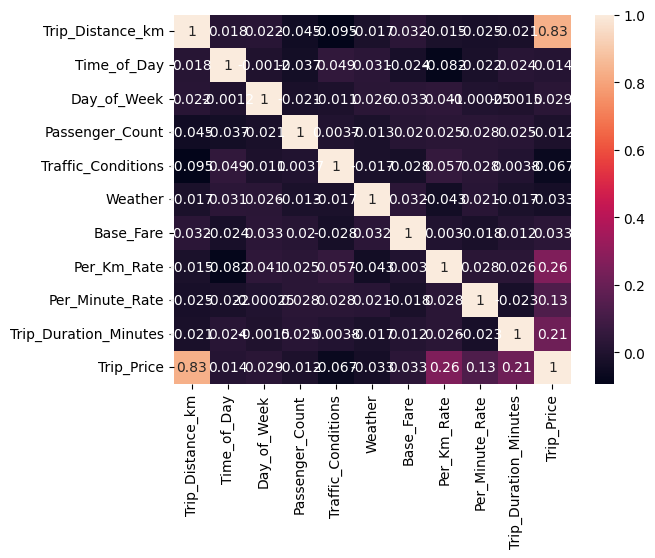

In [102]:
import seaborn as sb

print(data.corr()['Trip_Price'])

plot = sb.heatmap(data.corr(), annot=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = data.drop(columns = ['Trip_Price'])
Y = data['Trip_Price']

In [ ]:
X = scaler.fit_transform(X)
X

array([[-0.39491241, -0.03208069,  0.64686916, ..., -1.03326264,
         0.24181359, -0.26450216],
       [ 1.06128633,  0.97044082,  0.64686916, ..., -1.46314192,
         1.21865878, -0.68750333],
       [ 0.50850834, -1.03460219, -1.54590766, ..., -0.05409314,
        -1.26785626, -0.79285457],
       ...,
       [-0.99564596, -0.03208069,  0.64686916, ...,  1.30719127,
        -0.02459874, -0.25300929],
       [ 1.05973938, -0.03208069,  0.64686916, ..., -0.98549827,
        -1.09024804,  1.68673044],
       [-0.21443452, -0.03208069, -1.54590766, ..., -0.03021096,
        -0.55742339, -1.03484316]])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

lr = LinearRegression()
lr.fit(X_train, Y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print("Metrics: ")
print('Train set MAE: ', mean_absolute_error(Y_train, y_train_pred))
print('Train set R2: ', r2_score(Y_train, y_train_pred))
print('Test set MAE: ', mean_absolute_error(Y_test, y_test_pred))
print('Test set R2: ', r2_score(Y_test, y_test_pred)) # r2 score is 0.83 which is way better than I expected, especially because I manually encoded categorical data.

Metrics: 
Train set MAE:  10.610026691110418
Train set R2:  0.8359288597245391
Test set MAE:  9.569423217954386
Test set R2:  0.8341537129455938


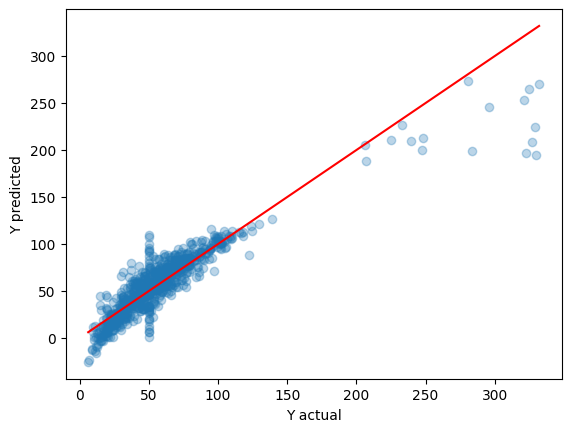

In [ ]:
plt.scatter(Y_train, y_train_pred, alpha=0.3)
plt.xlabel('Y actual')
plt.ylabel('Y predicted')
plt.plot([min(Y_train), max(Y_train)], [min(Y_train), max(Y_train)], 'r')
plt.show() # This shows rhat for fares in range 0-300, model almost accurately predicts the fare, but for fares > 300, errors increase.

In [ ]:
'''
Index(['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count',
       'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'],
      dtype='object')
'''

distance = float(input("Enter distance in KM: "))
time = int(input("Enter time [3 for afternoon, 2 for morning, 1 for evening, 0 for night]: "))
day = int(input("enter day [1 for weekday and 0 for weekend]: "))
passenger = int(input("Enter number of passengers: "))
traffic = int(input("Enter traffic conditions [2 for low, 1 for medium, 0 for high]: "))
weather = int(input("Enter weather conditions [2 for clear, 1 for rain, 0 for snow]: "))
base_fare = float(input("Enter base fare: "))
per_km_rate = float(input("Enter per km rate: "))
per_minute_rate = float(input("Enter per minute rate: "))
minutes = float(input("Enter trip minutes: "))

x_arr = np.array([distance, time, day, passenger, traffic, weather, base_fare, per_km_rate, per_minute_rate, minutes])
x_arr = scaler.transform([x_arr])

pred = lr.predict(x_arr)

print("Predicted Fare is: ", pred)

Enter distance in KM: 19.35
Enter time [3 for afternoon, 2 for morning, 1 for evening, 0 for night]: 2
enter day [1 for weekday and 0 for weekend]: 1
Enter number of passengers: 3
Enter traffic conditions [2 for low, 1 for medium, 0 for high]: 2
Enter weather conditions [2 for clear, 1 for rain, 0 for snow]: 2
Enter base fare: 3.56
Enter per km rate: 0.8
Enter per minute rate: 0.32
Enter trip minutes: 53.82
Predicted Fare is:  [31.80250694]
